In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
weights = pd.read_csv("weights-matrix.csv")
print(train_df)
print(test_df)

       response                                             review
0             2  A wonderful little production. <br /><br />The...
1             1  Basically there's a family where a little boy ...
2             1  This show was an amazing, fresh & innovative i...
3             1  So im not a big fan of Boll's work but then ag...
4             1  Kind of drawn in by the erotic scenes, only to...
...         ...                                                ...
14906         1  Robert Colomb has two full-time jobs. He's kno...
14907         1  This is your typical junk comedy.<br /><br />T...
14908         2  I thought this movie did a down right good job...
14909         1  Bad plot, bad dialogue, bad acting, idiotic di...
14910         1  No one expects the Star Trek movies to be high...

[14911 rows x 2 columns]
                                                  review
0      Petter Mattei's "Love in the Time of Money" is...
1      Phil the Alien is one of those quirky films wh...

<AxesSubplot:>

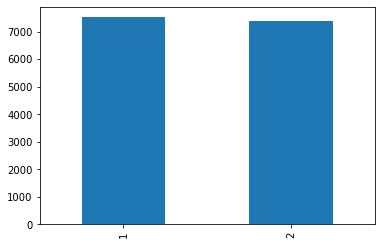

In [3]:
train_df["response"].value_counts().plot(kind="bar") #Dataset is half negative and half positive

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_df, test_size=0.2, random_state=31)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 5000, strip_accents = 'ascii', stop_words = 'english')

X_train = vectorizer.fit_transform(train_data['review'])
X_test = vectorizer.transform(test_data['review'])
y_train = train_data['response']
y_test = test_data['response']

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifiers
lr = LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier()

# Train the classifiers on the training data
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr.predict(X_test)
nb_pred = nb.predict(X_test)
rf_pred = rf.predict(X_test)

# Test the classifiers on the test data
lr_acc = lr.score(X_test, y_test)
nb_acc = nb.score(X_test, y_test)
rf_acc = rf.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {lr_acc}")
print(f"Naive Bayes Accuracy: {nb_acc}")
print(f"Random Forest Accuracy: {rf_acc}")

# Generate the confusion matrices
lr_cm = confusion_matrix(y_test, lr_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

class_labels = ["positive","negative"] # meant to represent 2 and 1
# Print the confusion matrices
print("Logistic Regression Confusion Matrix:")
print(lr_cm)
#plot_confusion_matrix(lr_cm, class_labels) 

print("\nNaive Bayes Confusion Matrix:")
print(nb_cm)
#plot_confusion_matrix(nb_cm, class_labels) 

print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
#plot_confusion_matrix(rf_cm, class_labels) 

C:\Users\bumin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.837076768354006
Naive Bayes Accuracy: 0.8437814280925243
Random Forest Accuracy: 0.845122360040228
Logistic Regression Confusion Matrix:
[[1258  253]
 [ 233 1239]]

Naive Bayes Confusion Matrix:
[[1287  224]
 [ 242 1230]]

Random Forest Confusion Matrix:
[[1295  216]
 [ 246 1226]]


In [7]:
test_df = vectorizer.transform(test_df['review'])

y_logistic_regression_pred = lr.predict(test_df)

print(y_logistic_regression_pred)

export_pred = pd.DataFrame(y_logistic_regression_pred, columns = ['response'])

# The header and the index are removed as this is required by the platform
export_pred.to_csv('logistic_regression.txt', index = False, header = False)

[2 1 1 ... 1 2 1]
